# Segmentation Clients

**Contexte du projet** 

Vous travaillez pour une entreprise qui commercialise des produits via différents canaux. En tant que data Data Scientist, votre manager souhaite que vous fassiez une analyse détaillée des clients de l'entreprise et de les segmenter. En effet, il souhaite mieux comprendre ses clients afin de leur proposer des produits en fonction leur besoin, leur comportement et leur préoccupation spécifique.

L'analyse de la personnalité du client aide une entreprise à modifier son produit en fonction de ses clients cibles issus de différents types de segments de clientèle. Par exemple, au lieu de dépenser de l'argent pour commercialiser un nouveau produit auprès de chaque client de la base de données de l'entreprise, une entreprise peut analyser quel segment de clientèle est le plus susceptible d'acheter le produit, puis commercialiser le produit uniquement sur ce segment particulier.

**Objectif de ce projet**

Utiliser différentes techniques d'analyse de données et machine learning pour faire la segmentation de clients.

**METADONNEES**

ID : Identifiant unique du client

Year_Birth : année de naissance du client

Éducation : niveau d'éducation du client

Marital_Status : état civil du client

Revenu : Revenu annuel du ménage du client

Kidhome : nombre d'enfants dans le ménage du client

Teenhome : Nombre d'adolescents dans le ménage du client

Dt_Customer : Date d'inscription du client auprès de l'entreprise

Récence : nombre de jours depuis le dernier achat du client

Plainte : 1 si le client s'est plaint au cours des 2 dernières années, 0 sinon


MntWines : Montant dépensé pour le vin au cours des 2 dernières années

MntFruits : Montant dépensé en fruits au cours des 2 dernières années

MntMeatProducts : montant dépensé pour la viande au cours des 2 dernières années

MntFishProducts : montant dépensé pour le poisson au cours des 2 dernières années

MntSweetProducts : montant dépensé en sucreries au cours des 2 dernières années

MntGoldProds : Montant dépensé en or au cours des 2 dernières années


NumDealsPurchases : nombre d'achats effectués avec une remise

AcceptedCmp1 : 1 si le client a accepté l'offre lors de la 1ère campagne, 0 sinon

AcceptedCmp2 : 1 si le client a accepté l'offre lors de la 2ème campagne, 0 sinon

AcceptedCmp3 : 1 si le client a accepté l'offre dans la 3ème campagne, 0 sinon

AcceptedCmp4 : 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon

AcceptedCmp5 : 1 si le client a accepté l'offre lors de la 5ème campagne, 0 sinon

Réponse : 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon


NumWebPurchases : nombre d'achats effectués sur le site Web de l'entreprise

NumCatalogPurchases : Nombre d'achats effectués à l'aide d'un catalogue

NumStorePurchases : Nombre d'achats effectués directement en magasin

NumWebVisitsMonth : nombre de visites sur le site Web de l'entreprise au cours du dernier mois


In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_column', 29)

In [64]:
# inportation et visualisation du dataset
df = pd.read_csv("data.csv", sep="\t", index_col='ID')
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
5524         1957  Graduation         Single  58138.0        0         0   
2174         1954  Graduation         Single  46344.0        1         1   
4141         1965  Graduation       Together  71613.0        0         0   
6182         1984  Graduation       Together  26646.0        1         0   
5324         1981         PhD        Married  58293.0        1         0   
...           ...         ...            ...      ...      ...       ...   
10870        1967  Graduation        Married  61223.0        0         1   
4001         1946         PhD       Together  64014.0        2         1   
7270         1981  Graduation       Divorced  56981.0        0         0   
8235         1956      Master       Together  69245.0        0         1   
9405         1954         PhD        Married  52869.0        1         1   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                 
5524   04-09-2012       58       635         88              546   
2174   08-03-2014       38        11          1                6   
4141   21-08-2013       26       426         49              127   
6182   10-02-2014       26        11          4               20   
5324   19-01-2014       94       173         43              118   
...           ...      ...       ...        ...              ...   
10870  13-06-2013       46       709         43              182   
4001   10-06-2014       56       406          0               30   
7270   25-01-2014       91       908         48              217   
8235   24-01-2014        8       428         30              214   
9405   15-10-2012       40        84          3               61   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                          
5524               172                88            88                  3   
2174                 2                 1             6                  2   
4141               111                21            42                  1   
6182                10                 3             5                  2   
5324                46                27            15                  5   
...                ...               ...           ...                ...   
10870               42               118           247                  2   
4001                 0                 0             8                  7   
7270                32                12            24                  1   
8235                80                30            61                  2   
9405                 2                 1            21                  3   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                               
5524                 8                   10                  4   
2174                 1                    1                  2   
4141                 8                    2                 10   
6182                 2                    0                  4   
5324                 5                    3                  6   
...                ...                  ...                ...   
10870                9                    3                  4   
4001                 8                    2                  5   
7270                 2                    3                 13   
8235                 6                    5                 10   
9405                 3                    1                  4   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
5524                   7             0             0             0   
2174                   5             0             0          

## Analyse exploratoire

#### Nombres de lignes & de colonnes

In [45]:
df.shape

(2240, 28)

Nous avons **2240 lignes** et **28 colonnes** dans notre jeux de données

In [46]:
# liste des variables
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

#### Identification des valeurs manquantes

In [47]:
(df.isna().sum()/df.shape[0])*100

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

On constate que la colonnes `Income`dispose d'environ 1% de valeurs manquantes

#### Type de variables

In [48]:
df.dtypes.value_counts()

int64      24
object      3
float64     1
dtype: int64

Nous avons **25 variables quantitatives** et **3 variables qualitatives**

#### Visualisation des variables 

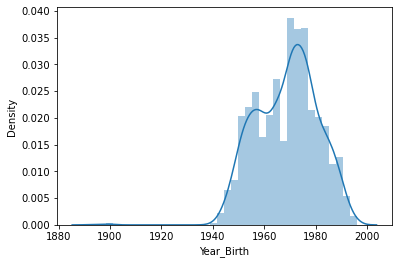

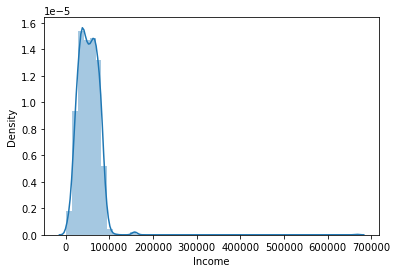

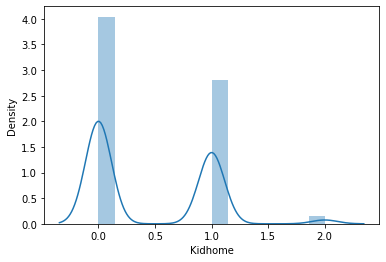

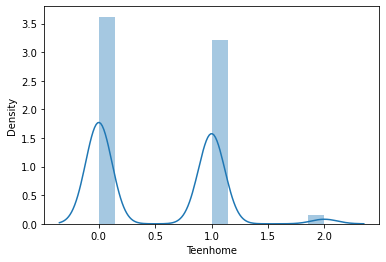

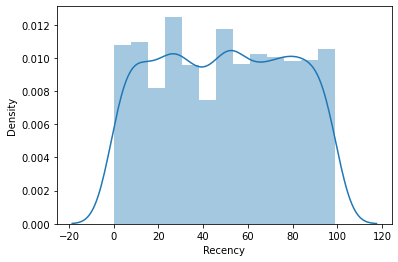

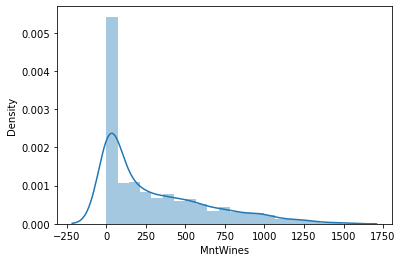

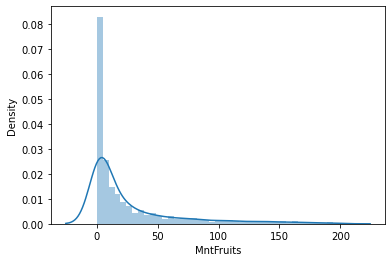

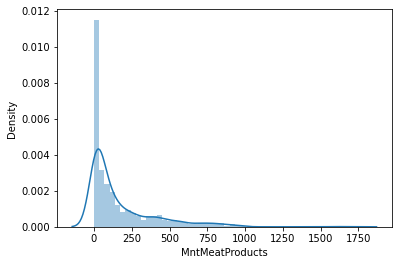

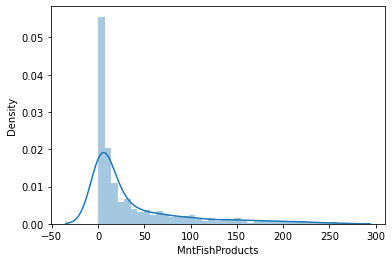

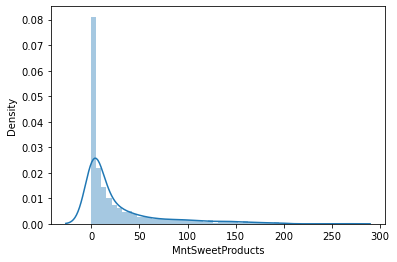

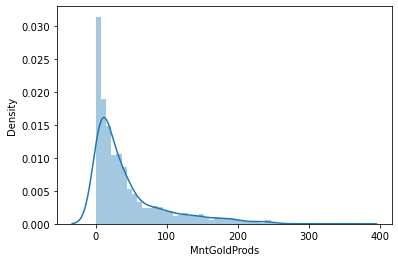

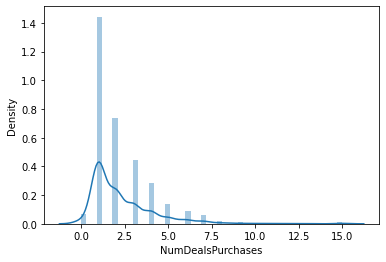

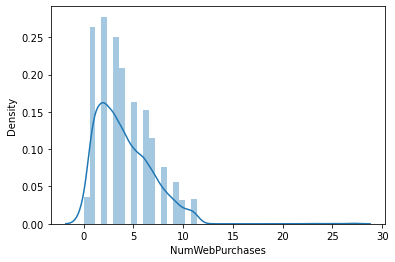

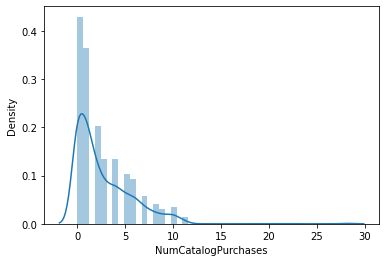

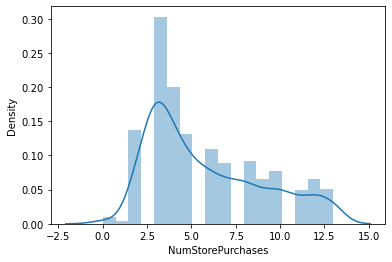

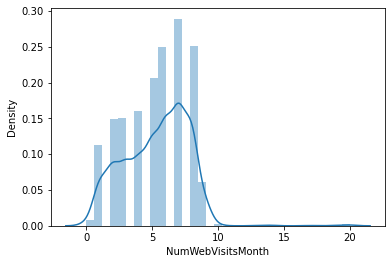

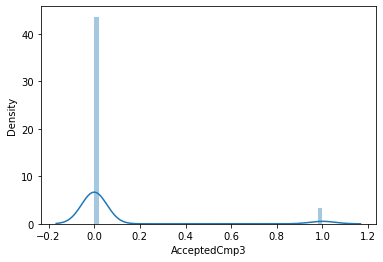

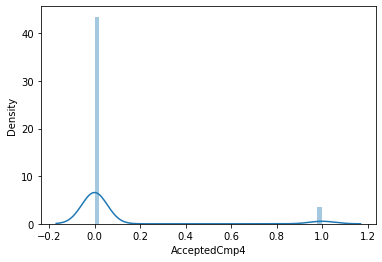

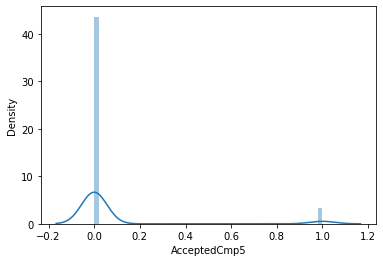

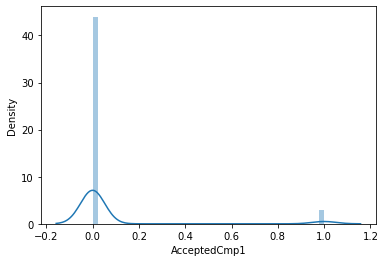

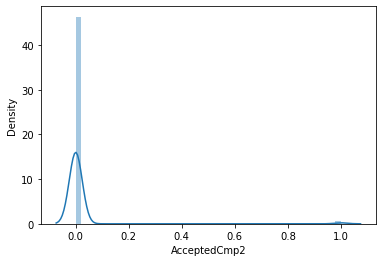

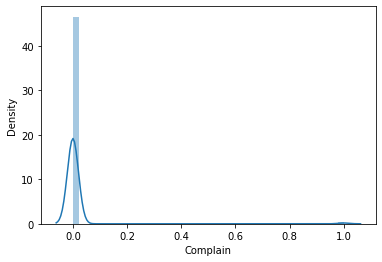

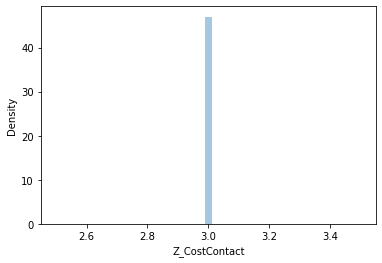

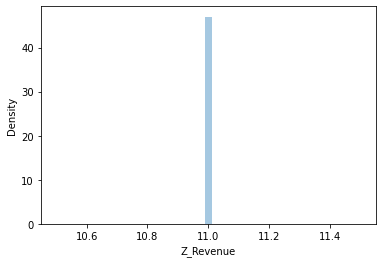

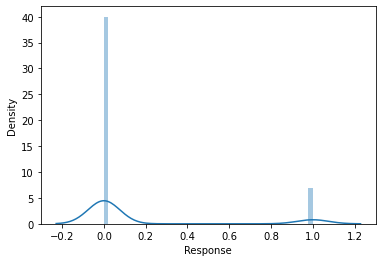

In [49]:
for col in df.select_dtypes(['float', 'int']):
    plt.figure()
    sns.distplot(df[col])

#### Visualisation des relations entre variables

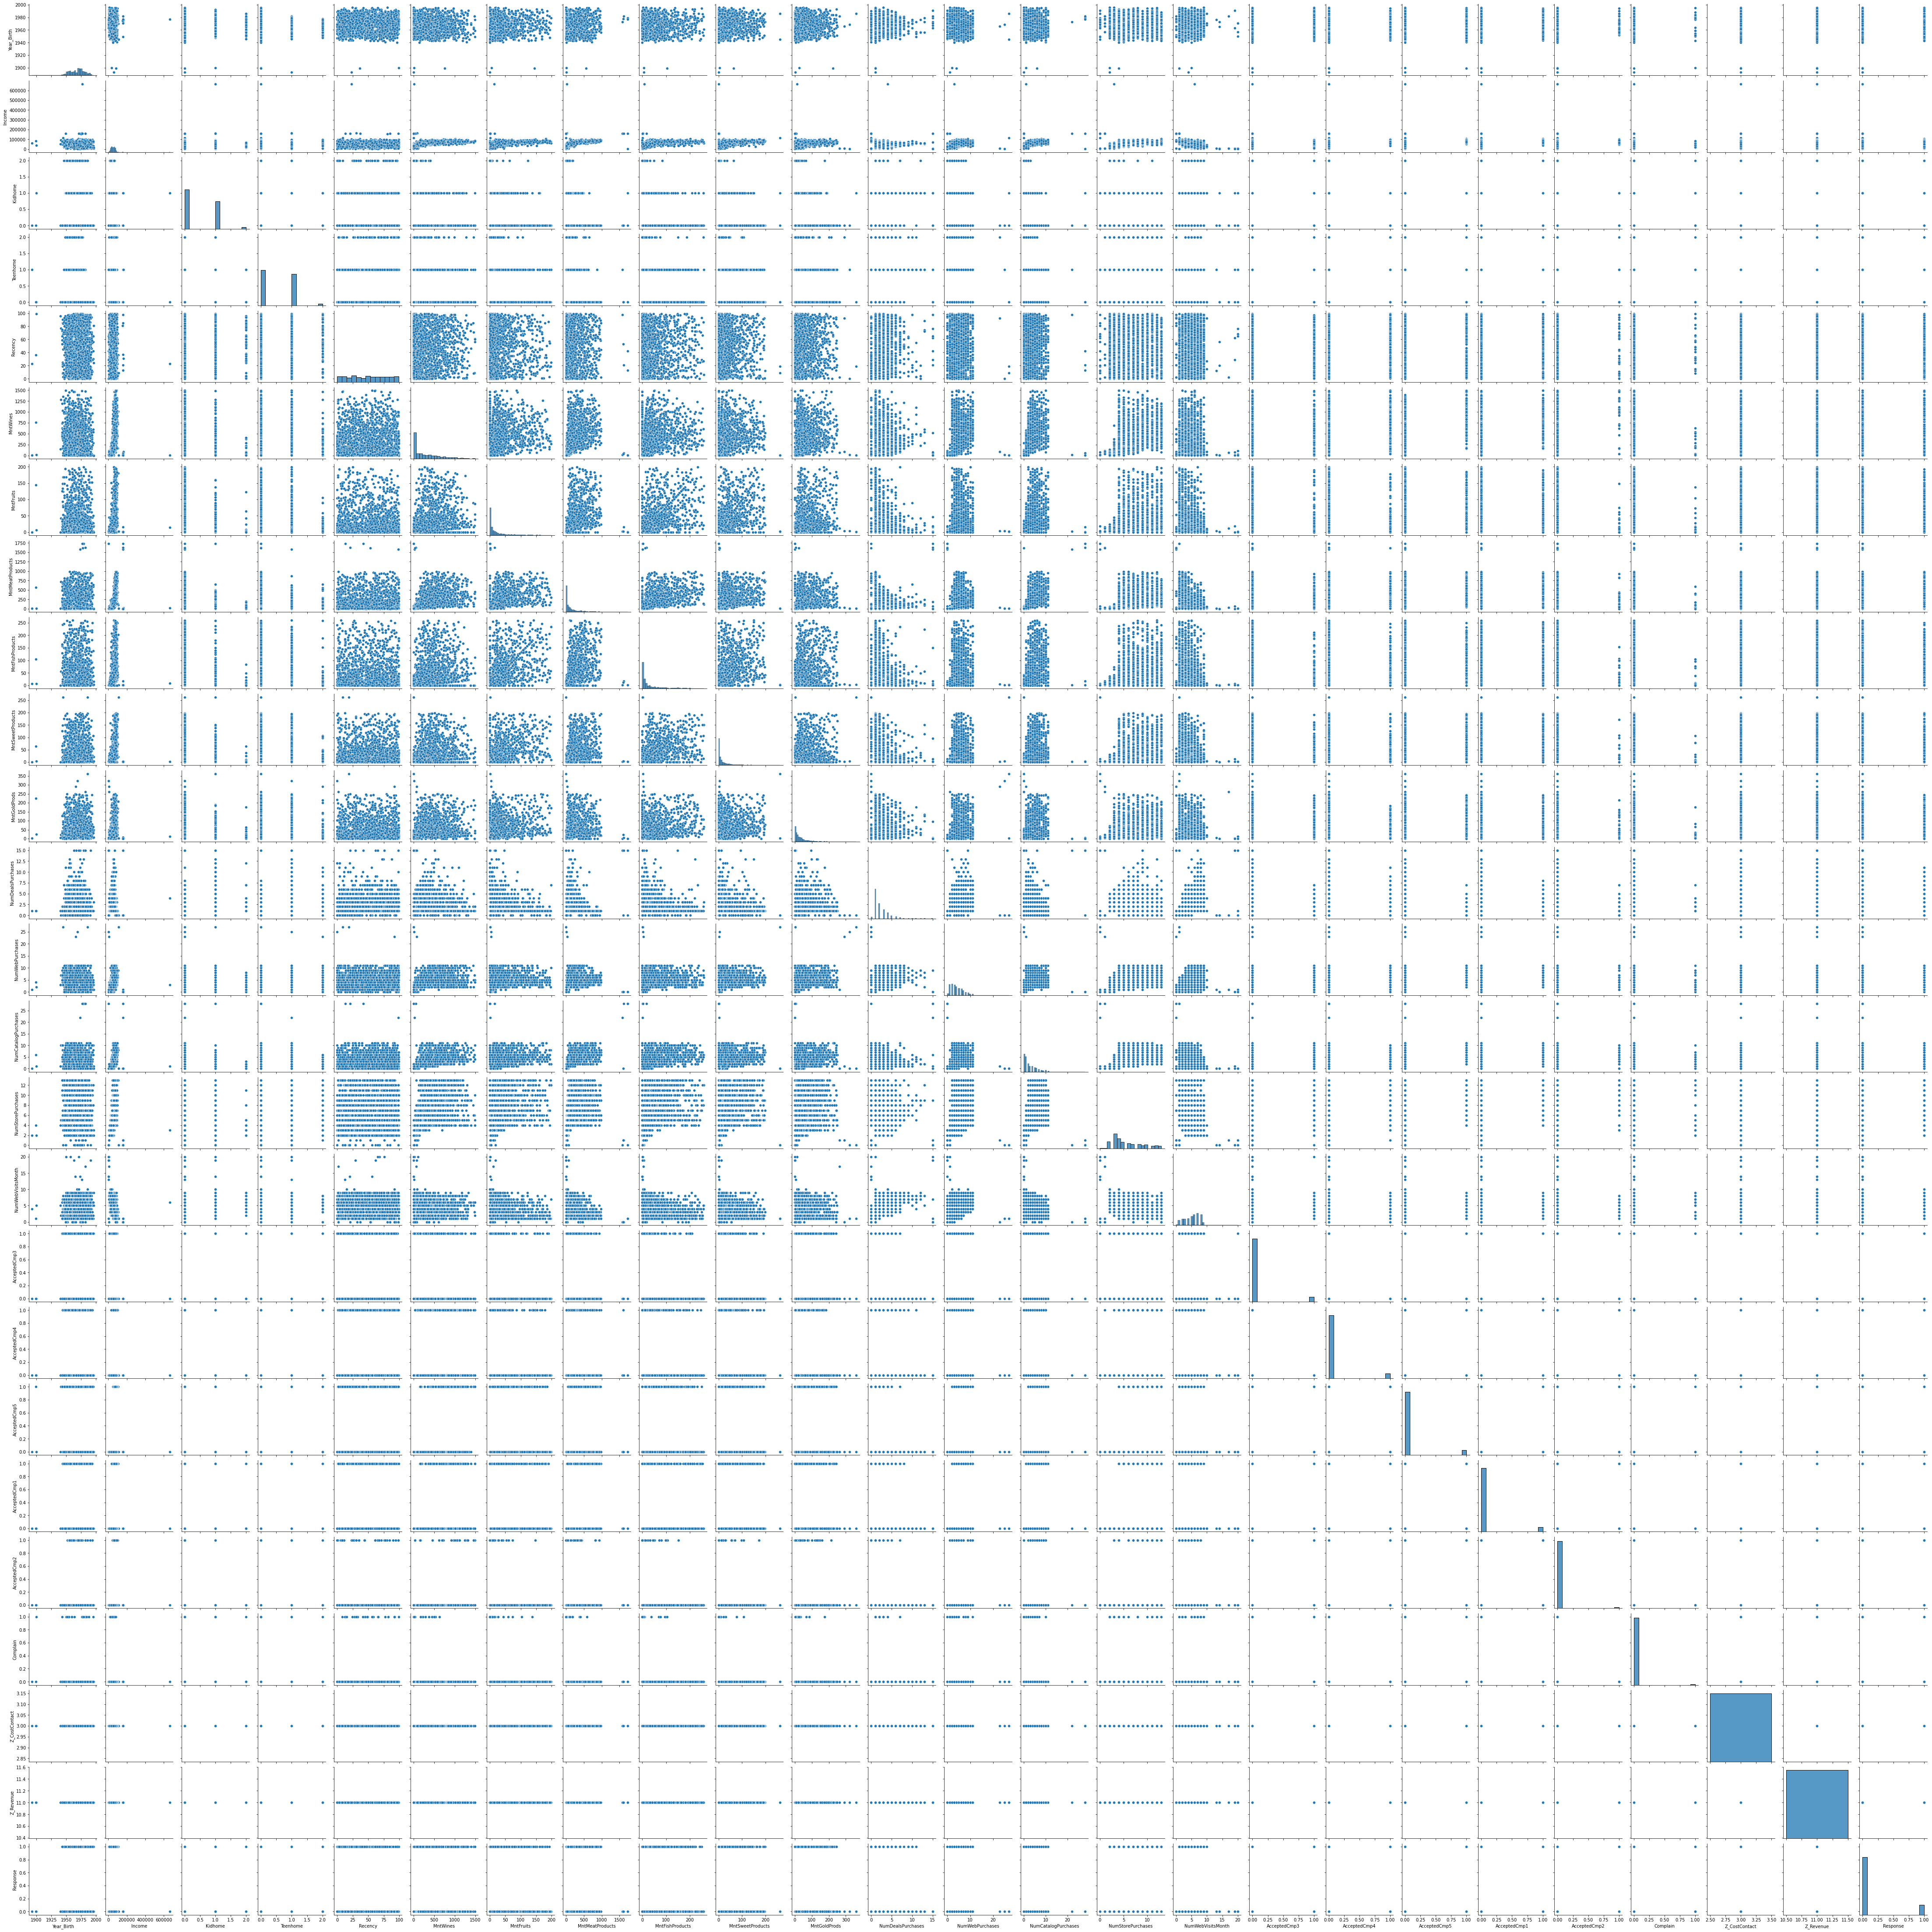

In [50]:
sns.pairplot(df)

#### Recherche des valeurs aberrantes

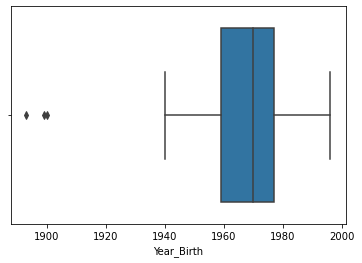

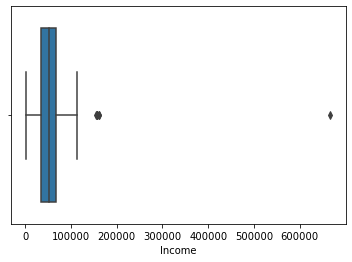

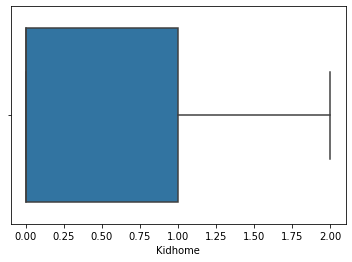

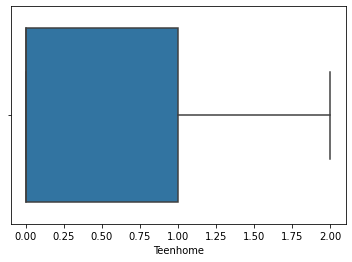

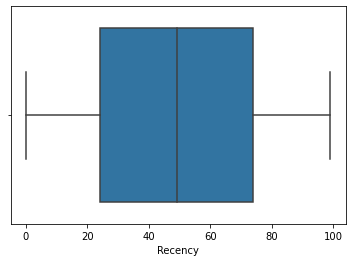

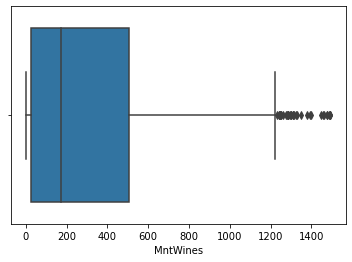

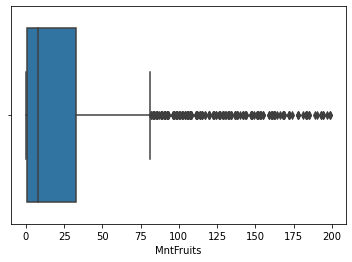

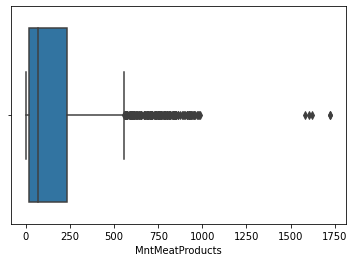

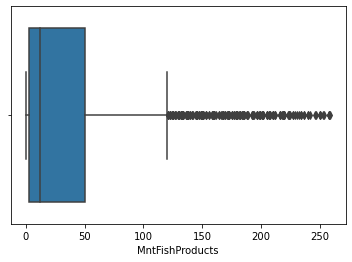

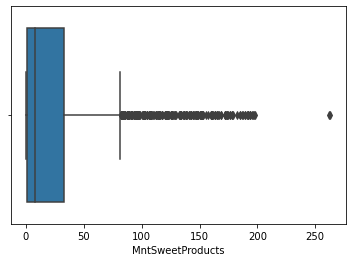

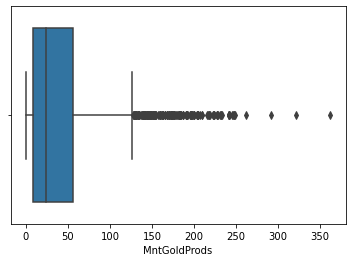

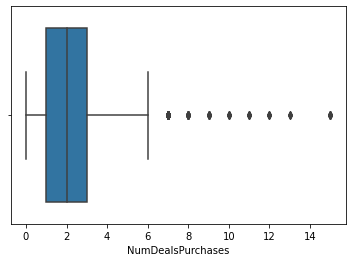

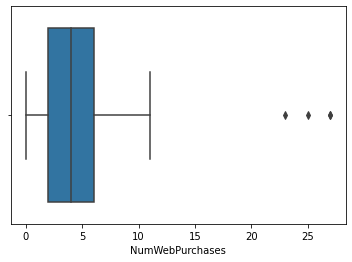

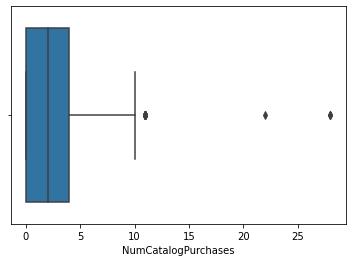

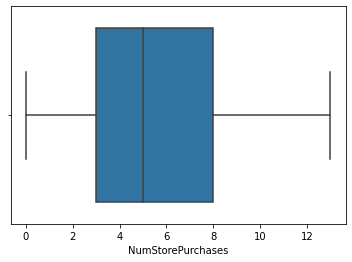

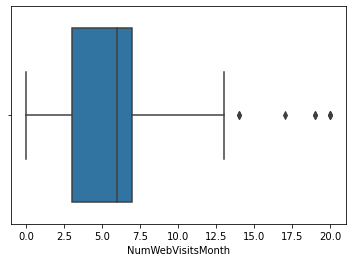

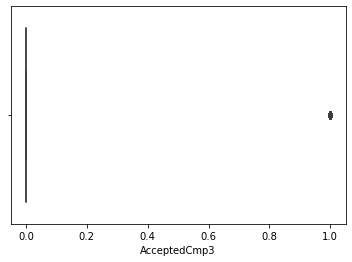

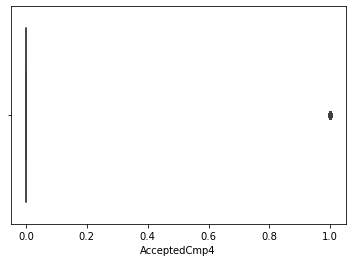

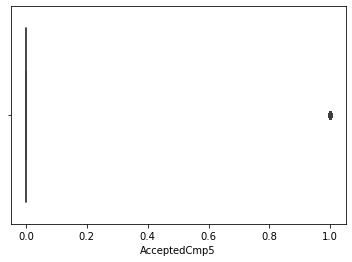

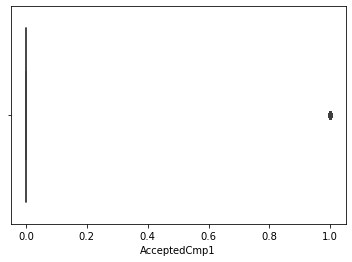

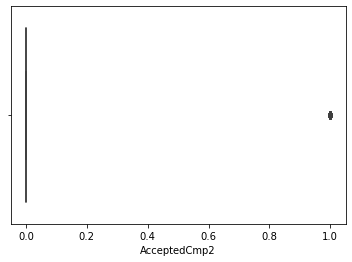

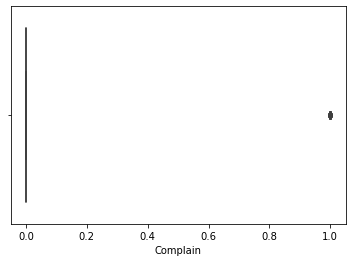

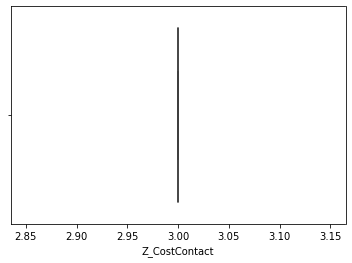

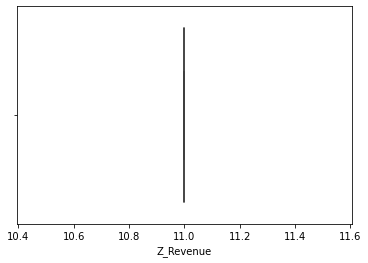

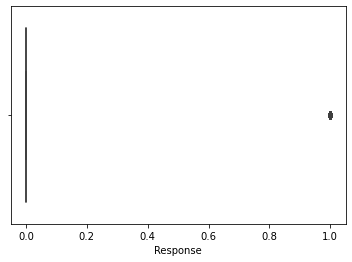

In [51]:
def outliers(df):
    for i in df.columns:
        if(df[i].dtype == 'int64'):
            sns.boxplot(df[i])
            plt.show()
            
        elif(df[i].dtype == 'float64'):
            sns.boxplot(df[i])
            plt.show()
            
outliers(df)

## Preprocessing

#### Feature Engineering

In [65]:
# transformons la variable Year_Birth en Age pour mieux categoriser nos clients

df['Year_Birth'] = datetime.now().year - df['Year_Birth']
df.rename(columns={'Year_Birth': 'Age'}, inplace=True)

In [79]:
# transformons les variables Kidhome & Teenhome en une variable is_parent 1 pour vrai

df["is_parent"] = df['Kidhome'] + df['Teenhome']
df['is_parent'] = df['is_parent'].astype('bool').astype('int')
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [83]:
# creeons une variables transactions afin de voir le nombre de transcation du client

df['transactions'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

df.drop(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1, inplace=True)

In [86]:
# creeons une variables de total dépenses 'expenses'

df['expenses'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [87]:
df

Age   Education Marital_Status   Income Dt_Customer  Recency  \
ID                                                                    
5524    64  Graduation         Single  58138.0  04-09-2012       58   
2174    67  Graduation         Single  46344.0  08-03-2014       38   
4141    56  Graduation       Together  71613.0  21-08-2013       26   
6182    37  Graduation       Together  26646.0  10-02-2014       26   
5324    40         PhD        Married  58293.0  19-01-2014       94   
...    ...         ...            ...      ...         ...      ...   
10870   54  Graduation        Married  61223.0  13-06-2013       46   
4001    75         PhD       Together  64014.0  10-06-2014       56   
7270    40  Graduation       Divorced  56981.0  25-01-2014       91   
8235    65      Master       Together  69245.0  24-01-2014        8   
9405    67         PhD        Married  52869.0  15-10-2012       40   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
5524                   7             0             0             0   
2174                   5             0             0             0   
4141                   4             0             0             0   
6182                   6             0             0             0   
5324                   5             0             0             0   
...                  ...           ...           ...           ...   
10870                  5             0             0             0   
4001                   7             0             0             0   
7270                   6             0             1             0   
8235                   3             0             0             0   
9405                   7             0             0             0   

       AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
ID                                                                      
5524              0             0         0              3         11   
2174              0             0         0              3         11   
4141              0             0         0              3         11   
6182              0             0         0              3         11   
5324              0             0         0              3         11   
...             ...           ...       ...            ...        ...   
10870             0             0         0              3         11   
4001              1             0         0              3         11   
7270              0             0         0              3         11   
8235              0             0         0              3         11   
9405              0             0         0              3         11   

       Response  is_parent  transactions  expenses  
ID                                                  
5524          1          0            25      1617  
2174          0          1             6        27  
4141          0          0            21       776  
6182          0          1             8        53  
5324          0          1            19       422  
...         ...        ...           ...       ...  
10870         0          1            18      1341  
4001          0          1            22       444  
7270          0          0            19      1241  
8235          0          1            23       843  
9405          1          1            11       172  

[2240 rows x 19 columns]